In [39]:
import pandas as pd
import matplotlib.pyplot as plt

In [40]:
bd = pd.read_csv("dataset.csv")
bd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   rank         250 non-null    int64  
 1   name         250 non-null    object 
 2   year         250 non-null    int64  
 3   rating       250 non-null    float64
 4   genre        250 non-null    object 
 5   certificate  250 non-null    object 
 6   run_time     250 non-null    object 
 7   tagline      250 non-null    object 
 8   budget       250 non-null    object 
 9   box_office   250 non-null    object 
 10  casts        250 non-null    object 
 11  directors    250 non-null    object 
 12  writers      250 non-null    object 
dtypes: float64(1), int64(2), object(10)
memory usage: 25.5+ KB


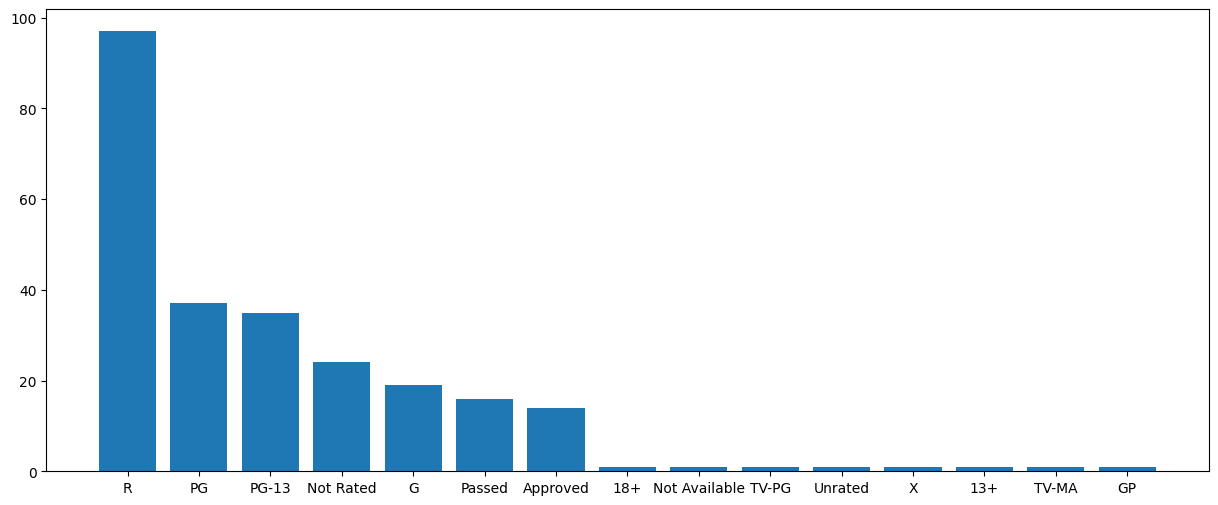

In [41]:
plt.figure(figsize=(15,6))
plt.bar(bd['certificate'].value_counts().index, bd['certificate'].value_counts().values)
plt.show()
#Gŕafico da quantidade de filmes por classificação indicativa

In [42]:
bd['rating'].mean()
#Média das notas dos filmes

8.3072

In [43]:
bd[['rating', 'year']].corr()
#Coeficiente de correlação entre nota e ano de lançamento

,rating,year
rating,1.000000,0.032203
year,0.032203,1.000000


In [52]:
print(bd['directors'].value_counts().max())
print(bd['directors'].value_counts())
#Moda dos diretores

7
directors
Martin Scorsese       7
Christopher Nolan     7
Steven Spielberg      7
Stanley Kubrick       7
Akira Kurosawa        7
                     ..
Jean-Pierre Jeunet    1
Orson Welles          1
Thomas Vinterberg     1
Elem Klimov           1
Kevin Costner         1
Name: count, Length: 160, dtype: int64


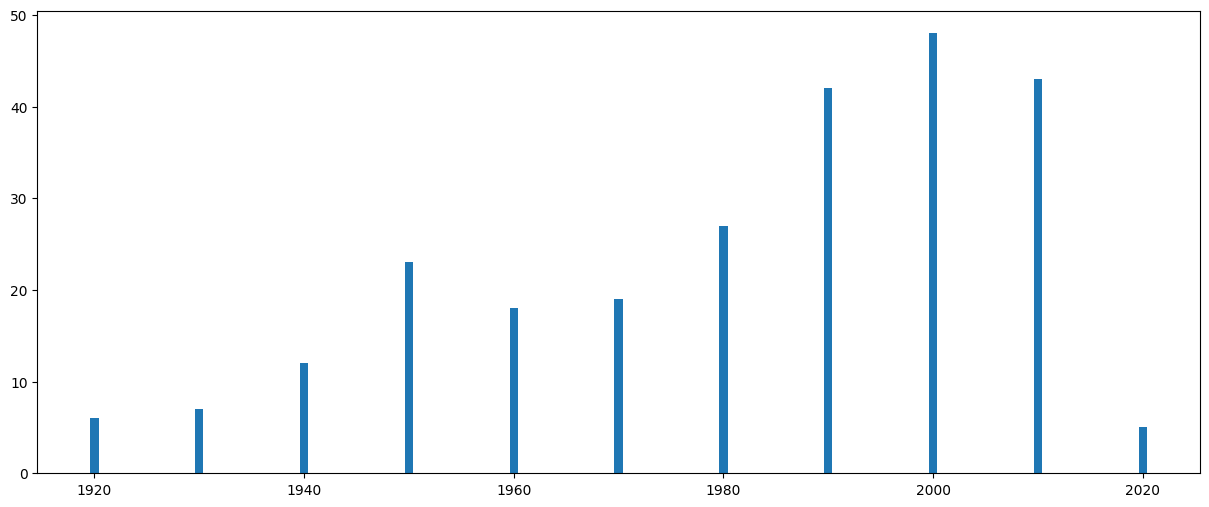

In [45]:
bd['decade'] = bd['year']//10*10

plt.figure(figsize=(15,6))
plt.bar(bd['decade'].value_counts().index, bd['decade'].value_counts().values)
plt.show()
#Gráfico da quantidade de filmes por década

In [55]:
bd['budget'] = pd.to_numeric(bd['budget'], errors='coerce')
bd['box_office'] = pd.to_numeric(bd['box_office'], errors='coerce')
#mudança das colunas de orçamento e bilheteria (de object para float64)


In [56]:
bd.head()

,rank,name,year,rating,genre,certificate,run_time,tagline,budget,box_office,casts,directors,writers,decade,profit
0,1,The Shawshank Redemption,1994,9.3,Drama,R,2h 22m,Fear can hold you prisoner. Hope can set you f...,25000000.0,2.888450e+07,"Tim Robbins,Morgan Freeman,Bob Gunton,William ...",Frank Darabont,"Stephen King,Frank Darabont",1990,3884504.0
1,2,The Godfather,1972,9.2,"Crime,Drama",R,2h 55m,An offer you can't refuse.,6000000.0,2.503418e+08,"Marlon Brando,Al Pacino,James Caan,Diane Keato...",Francis Ford Coppola,"Mario Puzo,Francis Ford Coppola",1970,244341816.0
2,3,The Dark Knight,2008,9.0,"Action,Crime,Drama",PG-13,2h 32m,Why So Serious?,185000000.0,1.006234e+09,"Christian Bale,Heath Ledger,Aaron Eckhart,Mich...",Christopher Nolan,"Jonathan Nolan,Christopher Nolan,David S. Goyer",2000,821234167.0
3,4,The Godfather Part II,1974,9.0,"Crime,Drama",R,3h 22m,All the power on earth can't change destiny.,13000000.0,4.796192e+07,"Al Pacino,Robert De Niro,Robert Duvall,Diane K...",Francis Ford Coppola,"Francis Ford Coppola,Mario Puzo",1970,34961919.0
4,5,12 Angry Men,1957,9.0,"Crime,Drama",Approved,1h 36m,Life Is In Their Hands -- Death Is On Their Mi...,350000.0,9.550000e+02,"Henry Fonda,Lee J. Cobb,Martin Balsam,John Fie...",Sidney Lumet,Reginald Rose,1950,-349045.0


In [47]:
bd[['year', 'box_office']].corr()
#Coeficiente de correlação entre ano de lançamento e bilheteria

,year,box_office
year,1.000000,0.455255
box_office,0.455255,1.000000


In [48]:
bd['profit'] = bd['box_office']-bd['budget']
#criação da coluna de lucro (bilheteria - custo)

In [ ]:
prejuizo = bd[bd['profit']<0]
print(len(prejuizo))
prejuizo
#Filmes que geraram prejuízo (custo de produção maior que bilheteria)

In [62]:
bd.groupby(['decade'])['budget'].mean()


decade
1920    6.410000e+05
1930    1.996500e+06
1940    1.521799e+06
1950    9.714803e+06
1960    4.329068e+06
1970    7.762609e+06
1980    1.870833e+07
1990    1.003378e+08
2000    7.180750e+07
2010    9.376765e+07
2020    1.253333e+08
Name: budget, dtype: float64

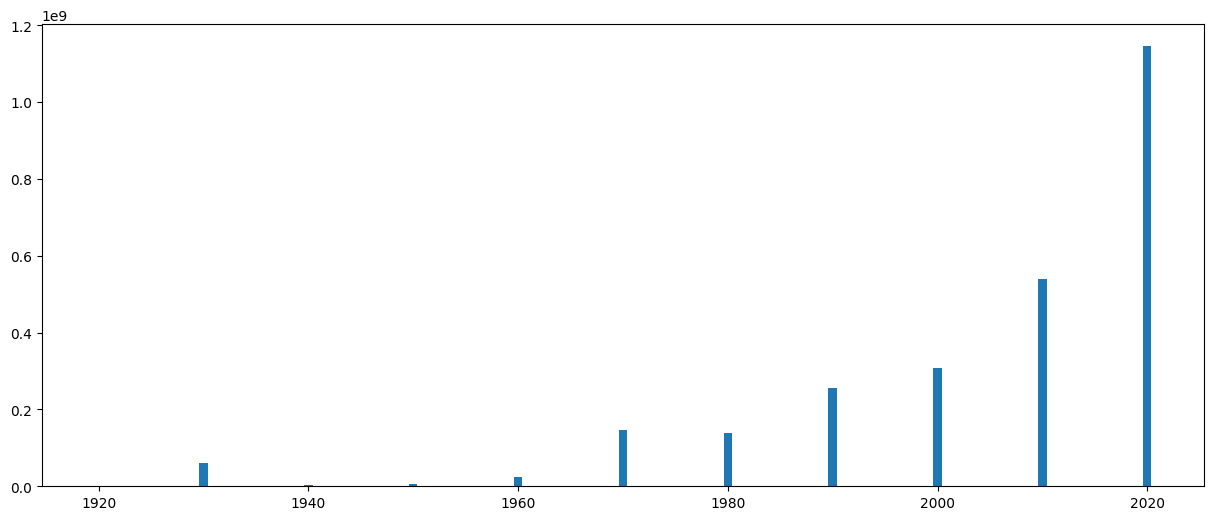

In [54]:
plt.figure(figsize=(15,6))
plt.bar(bd.groupby(['decade'])['box_office'].mean().index, bd.groupby(['decade'])['box_office'].mean().values)
plt.show()
#Gráfico da média de bilheteria por década

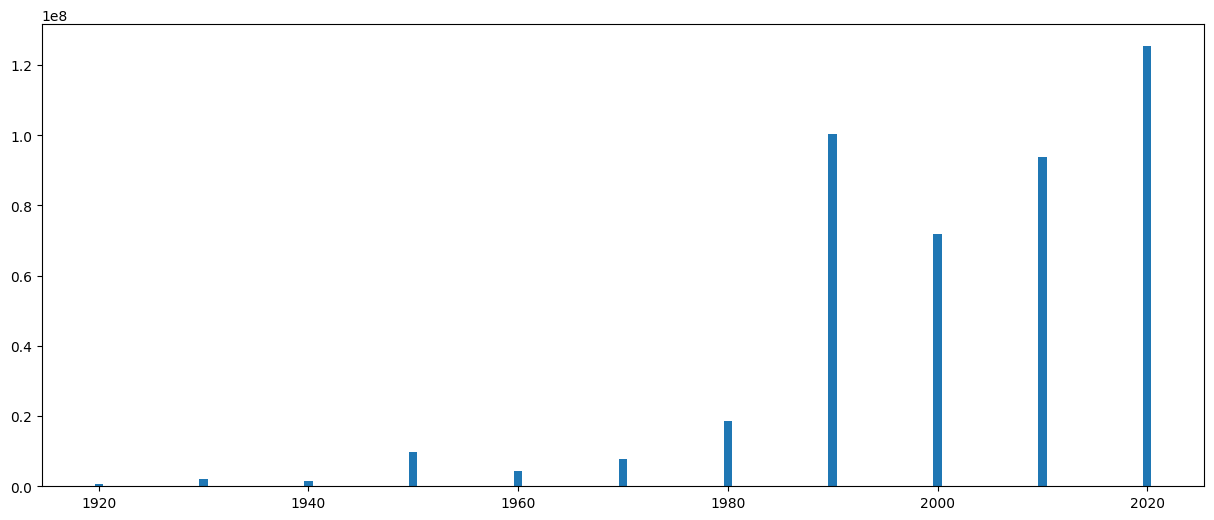

In [63]:
plt.figure(figsize=(15,6))
plt.bar(bd.groupby(['decade'])['budget'].mean().index, bd.groupby(['decade'])['budget'].mean().values)
plt.show()
#Gráfico da média de custo de produção por década